In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('spam.csv',encoding_errors= 'replace')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#1 Data Cleaning
#2 EDA
#3 Text Preprocessing
#4 Model Building
#5 Evaluation
#6 Improvment
#7 Website
#8 Deploy

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop Last 3 column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
3705,ham,Reading gud habit.. Nan bari hudgi yorge patai...
112,ham,I'm ok wif it cos i like 2 try new things. But...
858,ham,Spoons it is then okay?
4076,ham,Hey sathya till now we dint meet not even a si...
5226,ham,Prabha..i'm soryda..realy..frm heart i'm sory


In [10]:
#renaming the column
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## EDA

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

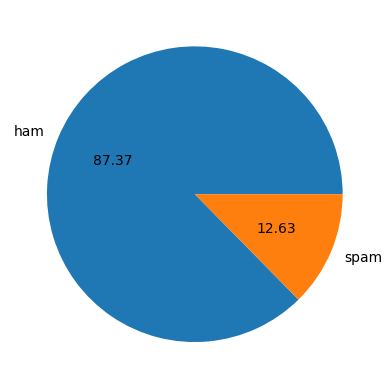

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# data is imbalanced

In [22]:
import nltk

In [23]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssaur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
df['num_characters']=df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
# num of sentence
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.454246,1.948152
std,58.174846,13.325668,1.363792
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.120903,1.799601
std,56.356802,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.975498
std,30.014336,7.011513,1.487993
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [33]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

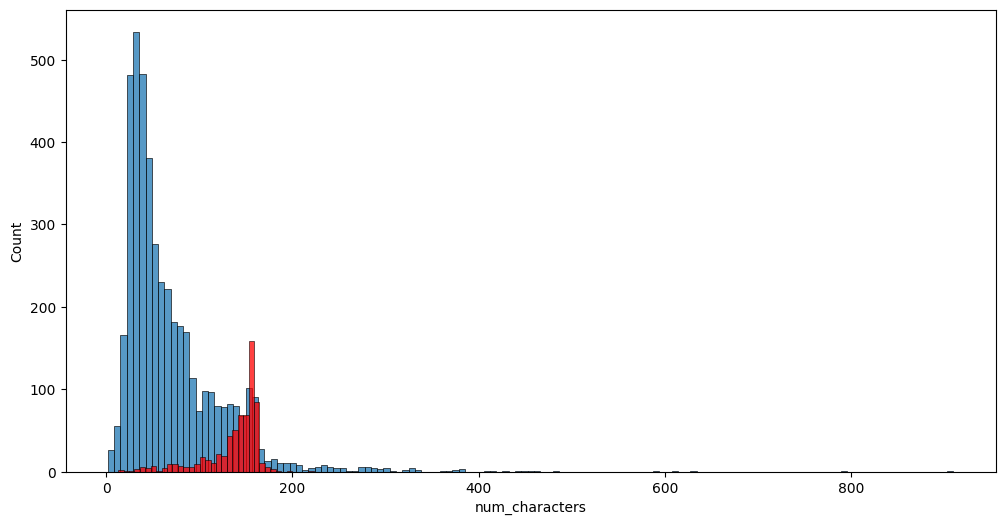

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

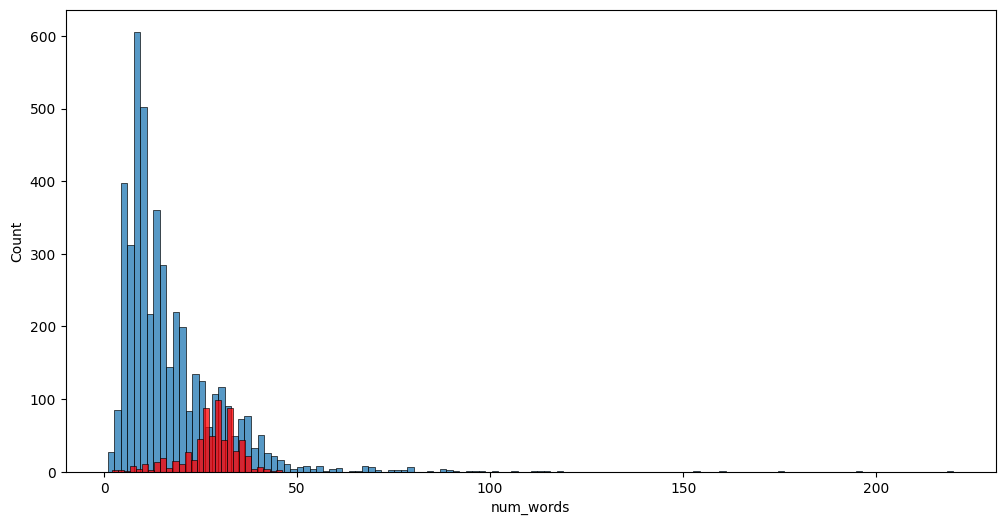

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

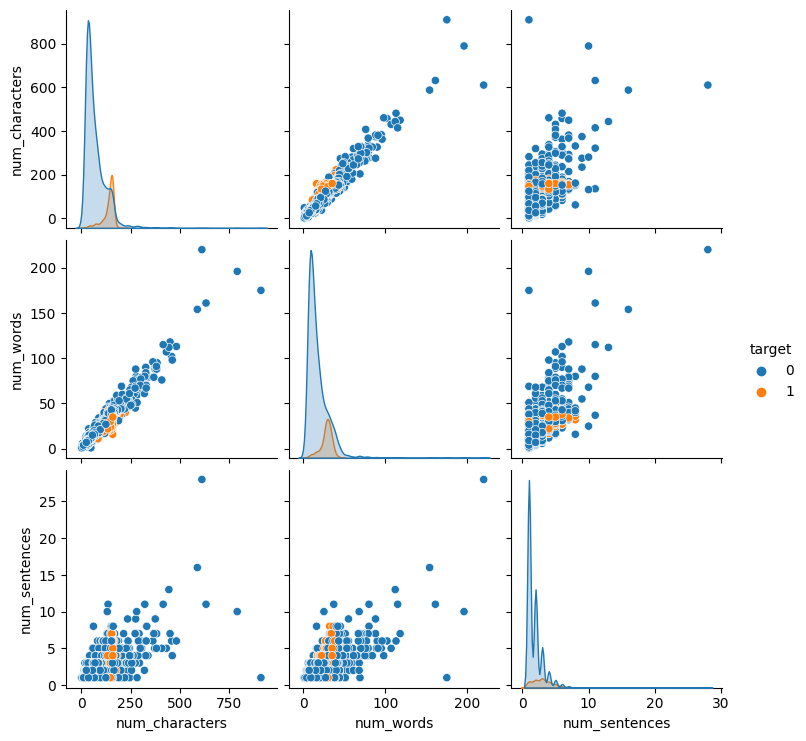

In [36]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

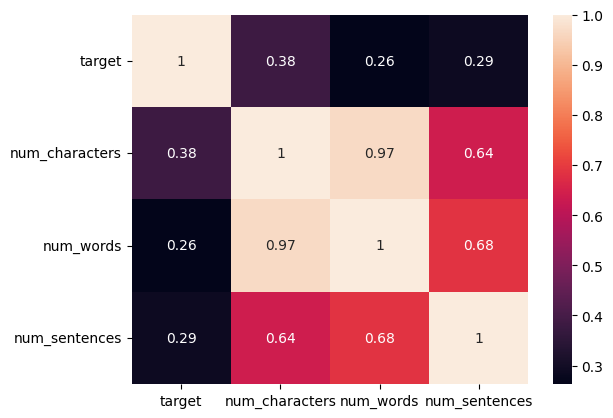

In [37]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

#### Lower case
#### Tokenization
#### Removing Special Characters
#### Removing stop words and punctuation
#### Stemming

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    #you cannot copy list directly, use y[:]
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [41]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
transform_text("Hie How dance & % ? Sam") 

'hie danc sam'

In [44]:
df['transformed_text']=df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
!pip install wordcloud


You should consider upgrading via the 'C:\Users\ssaur\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700, min_font_size=10,background_color='white')

In [77]:
df[df['target']==1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

In [85]:
s = pd.Series(["A_Str_Series"])
s.str

In [86]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

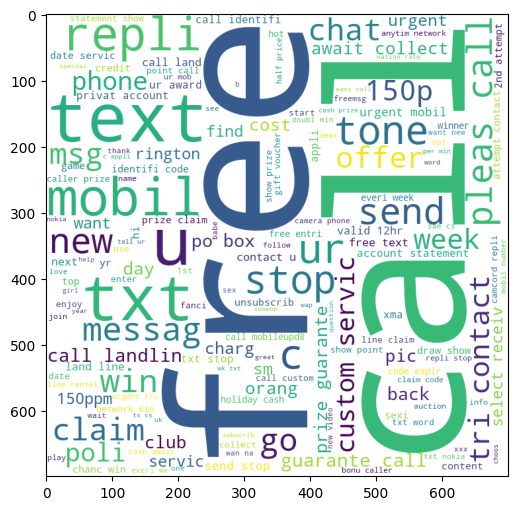

In [87]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [88]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

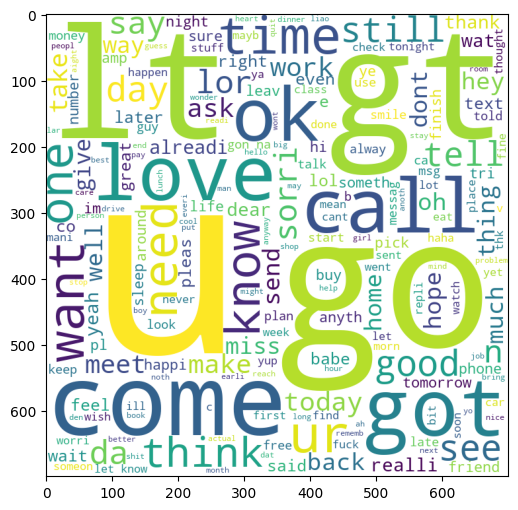

In [89]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [92]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [93]:
len(spam_corpus)

9941

In [ ]:
pd.DataFrame(Counter(spam_corpus).most_common(30))


In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

### naive bayes are used for text data mostly

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))